## Additional Feature -- Multi-class classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive/P1_Final/"
!pip install import-ipynb
import import_ipynb

#supress warning messages
import warnings
warnings.filterwarnings('ignore')

# importing helper functions for data preprocessing and model visualization
import plotlib_helper as graphplot
import datapreprocess_helper as dataprep

/content/drive/My Drive/P1_Final


## Load Data

In [ ]:
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

path = "/content/drive/My Drive/P1_Final/"
    
train_read = os.path.join(path,"data/P1_MultiClass_preprocess_TRAINSET.csv")
test_read = os.path.join(path,"data/P1_MultiClass_preprocess_TESTSET.csv")

df_train = pd.read_csv(train_read)
df_test= pd.read_csv(test_read)

# label encoding of column: attack category 
attack_cat_labels = dataprep.encode_text_index(df_train, 'attack_cat')
dataprep.encode_text_index(df_test, 'attack_cat')

print("Successfully loaded preprocessed data sets")
print(df_train.shape)
print(df_test.shape)



Successfully loaded preprocessed data sets
(80609, 60)
(35179, 60)


### Converting into Numpy arrays

In [ ]:
# converting x, y numpy arrays for TensorFlow 
x_train, y_train = dataprep.to_xy(df_train, 'attack_cat')
x_test, y_test = dataprep.to_xy(df_test, 'attack_cat')
print(f"Training set shape x:{x_train.shape} y:{y_train.shape}")
print(f"Testing set shape x:{x_test.shape} y:{y_test.shape}")
y_train

Training set shape x:(80609, 59) y:(80609, 8)
Testing set shape x:(35179, 59) y:(35179, 8)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
filepath_savemodel = os.path.join(path,"dnn/proj1_multiclass.hdf5")
# checkpoint to save the best weights 
checkpoint = ModelCheckpoint(filepath= filepath_savemodel, verbose=0, save_best_only=True) # save best model

for i in range(5):
    neuralnets_model = Sequential()
    neuralnets_model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
    neuralnets_model.add(Dense(10, activation='relu'))
    neuralnets_model.add(Dense(y_train.shape[1], activation='softmax'))
    neuralnets_model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')

    neuralnets_model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpoint],verbose=2,epochs=100)


neuralnets_model.load_weights(filepath_savemodel) # load weights from best model


Epoch 1/100
2520/2520 - 3s - loss: 0.2624 - val_loss: 0.1654
Epoch 2/100
2520/2520 - 3s - loss: 0.1759 - val_loss: 0.1518
Epoch 3/100
2520/2520 - 3s - loss: 0.1668 - val_loss: 0.1446
Epoch 4/100
2520/2520 - 3s - loss: 0.1612 - val_loss: 0.1436
Epoch 5/100
2520/2520 - 3s - loss: 0.1580 - val_loss: 0.1433
Epoch 6/100
2520/2520 - 3s - loss: 0.1552 - val_loss: 0.1513
Epoch 7/100
2520/2520 - 3s - loss: 0.1526 - val_loss: 0.1423
Epoch 8/100
2520/2520 - 3s - loss: 0.1507 - val_loss: 0.1418
Epoch 9/100
2520/2520 - 3s - loss: 0.1494 - val_loss: 0.1442
Epoch 10/100
2520/2520 - 3s - loss: 0.1470 - val_loss: 0.1506
Epoch 00010: early stopping
Epoch 1/100
2520/2520 - 3s - loss: 0.2775 - val_loss: 0.1718
Epoch 2/100
2520/2520 - 3s - loss: 0.1799 - val_loss: 0.1541
Epoch 3/100
2520/2520 - 3s - loss: 0.1704 - val_loss: 0.1523
Epoch 4/100
2520/2520 - 3s - loss: 0.1648 - val_loss: 0.1440
Epoch 5/100
2520/2520 - 3s - loss: 0.1607 - val_loss: 0.1440
Epoch 6/100
2520/2520 - 3s - loss: 0.1574 - val_loss: 0.

In [ ]:
print(attack_cat_labels)


['Backdoor' 'DoS' 'Exploits' 'Fuzzers' 'Generic' 'Normal' 'Reconnaissance'
 'Worms']


Attack class category
---------------------------------------
Accuracy score: 0.952755905511811
Precision score: 0.943982189832143
Recall score: 0.952755905511811
F1 score: 0.9442279880040598


[[    0     0     8     2     1     0     0     0]
 [    0    37   616    13    24     1    26     0]
 [    0    27  5069   103     9     0    85     0]
 [    0     1    38   469     0     0    27     0]
 [    0    30   248     3 18173     0     6     0]
 [    0     0     0     0     0  9625     0     0]
 [    0     2   349     2     7     0   144     0]
 [    0     0    32     0     2     0     0     0]]


Plotting confusion matrix


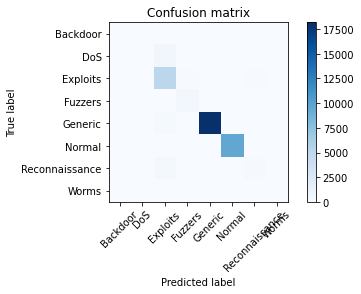



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.38      0.05      0.09       717
           2       0.80      0.96      0.87      5293
           3       0.79      0.88      0.83       535
           4       1.00      0.98      0.99     18460
           5       1.00      1.00      1.00      9625
           6       0.50      0.29      0.36       504
           7       0.00      0.00      0.00        34

    accuracy                           0.95     35179
   macro avg       0.56      0.52      0.52     35179
weighted avg       0.94      0.95      0.94     35179




In [ ]:
pred = neuralnets_model.predict(x_test)
pred = np.argmax(pred,axis=1)
plotRoc = False
graphplot.performance_metrics(pred, y_test, attack_cat_labels, "Attack class category", plotRoc)